<a href="https://colab.research.google.com/github/Mbigdeli2003/Deep-Learning/blob/main/DNN_HW2_Q2_Morteza_Bigdeli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DNN HW2 Morteza Bigdeli 40261662001

## importing libraries

In [1]:
import numpy as np
import torch
import torch.nn as nn
import tensorflow as tf
import torchvision
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

## A and B: Logistic Regression and visuilaziation

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


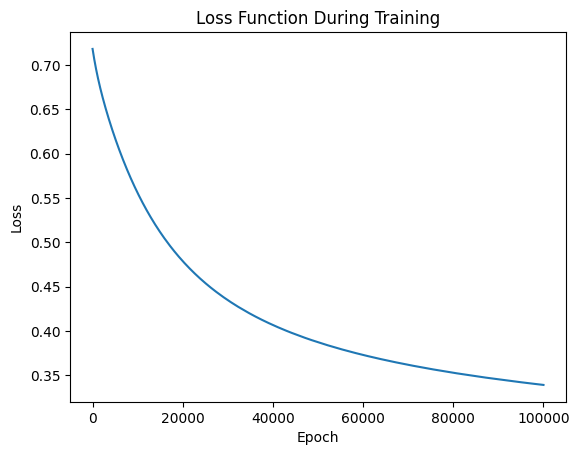

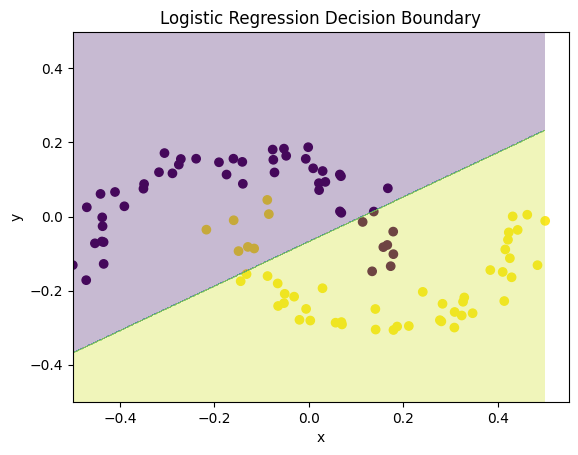

In [2]:
# Load the dataset
from google.colab import drive
drive.mount('/content/drive')
data = np.load('/content/drive/MyDrive/2d_pcl_dataset.npz')
X = torch.from_numpy(data['X']).float()
y = torch.from_numpy(data['y']).long()

# Define the logistic regression model
model = torch.nn.Linear(2, 2)

# Define the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Train the model and track loss values
num_epochs = 100000
loss_values = []
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Track loss values for plotting
    loss_values.append(loss.item())

# Visualize the loss function during iterations
plt.plot(range(num_epochs), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Function During Training')
plt.show()

# Visualize the results
x_range = np.arange(-0.5, 0.5, 0.002)
y_range = np.arange(-0.5, 0.5, 0.002)
xx, yy = np.meshgrid(x_range, y_range)
xy_pairs = np.column_stack([xx.ravel(), yy.ravel()])
xy_pairs_tensor = torch.from_numpy(xy_pairs).float()
with torch.no_grad():
    predictions = model(xy_pairs_tensor).argmax(dim=1).numpy().reshape(xx.shape)

plt.scatter(X[:, 0], X[:, 1], c=y.numpy())
plt.contourf(xx, yy, predictions, alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Regression Decision Boundary')
plt.show()

## C and D MLP train and visulaization

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


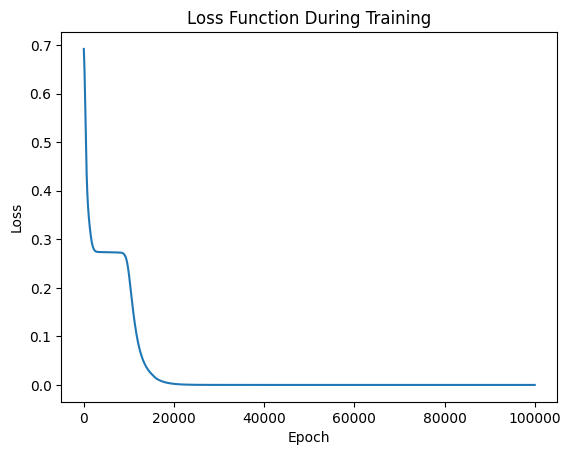

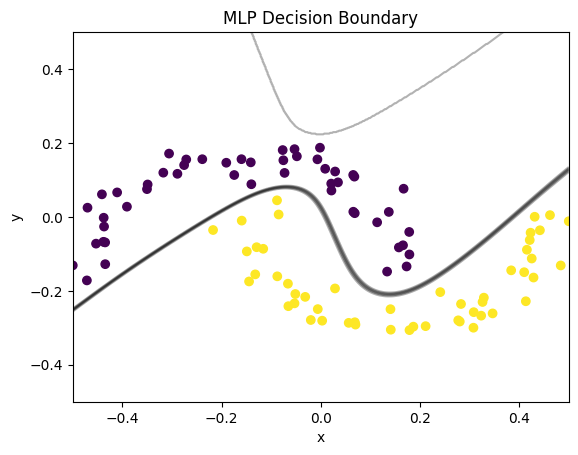

In [3]:
from google.colab import drive
drive.mount('/content/drive')
data = np.load('/content/drive/MyDrive/2d_pcl_dataset.npz')
X = torch.from_numpy(data['X']).float()
y = torch.from_numpy(data['y']).float()
# Define the MLP model
model= torch.nn.Sequential(
    torch.nn.Linear(2, 16),
    torch.nn.Sigmoid(),
    torch.nn.Linear(16, 1),
    torch.nn.Sigmoid()
)

# Define the loss function and optimizer
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model and track loss values
num_epochs = 100000
loss_values = []
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs.squeeze(), y)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Track loss values for plotting
    loss_values.append(loss.item())

# Visualize the loss function during iterations
plt.plot(range(num_epochs), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Function During Training')
plt.show()

# Visualize the results
x_range = np.linspace(-0.5, 0.5,500)
y_range = np.linspace(-0.5, 0.5, 500)
xx, yy = np.meshgrid(x_range, y_range)
xy_pairs = np.column_stack([xx.ravel(), yy.ravel()])
xy_pairs_tensor = torch.from_numpy(xy_pairs).float()
with torch.no_grad():
    predictions = model(xy_pairs_tensor).numpy().reshape(xx.shape)

plt.scatter(X[:, 0], X[:, 1], c=y.numpy())
plt.contour(xx, yy, predictions, alpha=0.3, colors='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('MLP Decision Boundary')
plt.show()
